In [1]:
from subhalos_SA2 import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
M0=1e12                         #Mass of the host halo.
redshift = 0.
N_ma=200                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for mass accretion.
N_r=100                         #The number of radius values in the given range [0.01,1]

logmamin=-6                     #The minimum subhalos' masss in units of ln(mass).
mmodel_1=5                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=1                      #This dm/dt model correspond to the model with no spatial information.

In [3]:
q_list = np.logspace(-3,0,10)*0.99
nsh_list = np.empty_like(q_list)
for i in np.arange(np.alen(q_list)):
    q = q_list[i]
    ma200,rs_a,rhos_a,m0,rs0,rhos0,ct0,weight,survive_new \
        = rs_rhos_calc_one_r(M0=M0,radius=q,redshift=redshift,
                             logmamin=logmamin,N_ma=N_ma,
                             zmax=zmax,mmodel=mmodel_1)
    Nsh = np.sum(weight[(m0>1)*(survive_new==1)])
    
    c = c_from_Mvir(Mvir=M0*Msolar,z=redshift)
    Oz = Omegaz(pOmega,redshift)
    rvir = (3.*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)
    rs = rvir/c
    r = q*rvir
    nsh = Nsh/(4.*np.pi*r*(r+rs)**2*(np.log(1.+c)-c/(1.+c)))
    nsh_list[i] = nsh/(kpc**-3)

/Users/ando/Desktop/Lefteris/subhalos_SA2.py:516: RuntimeWarning: invalid value encountered in true_divide
  rhos_z0[iz] = (4.625/(4*np.pi*G))*pow(Vmax_z0/rs_z0[iz],2)
/Users/ando/Desktop/Lefteris/subhalos_SA2.py:228: RuntimeWarning: divide by zero encountered in power
  normB=pow(2*np.pi,-0.5)*delca*0.57*pow(delca/np.sqrt(sM),-0.01)*(2./(1.-0.38))*pow(sM,-0.38/2.)*pow(xmin,0.5*(0.38-1.))*special.hyp2f1(0.5*(1-0.38),-0.38/2.,0.5*(3.-0.38),-sM/xmin)
/Users/ando/Desktop/Lefteris/subhalos_SA2.py:228: RuntimeWarning: divide by zero encountered in true_divide
  normB=pow(2*np.pi,-0.5)*delca*0.57*pow(delca/np.sqrt(sM),-0.01)*(2./(1.-0.38))*pow(sM,-0.38/2.)*pow(xmin,0.5*(0.38-1.))*special.hyp2f1(0.5*(1-0.38),-0.38/2.,0.5*(3.-0.38),-sM/xmin)
/Users/ando/Desktop/Lefteris/subhalos_SA2.py:166: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*dela*pow(sig2-sig1,-1.5)


In [4]:
q_list2 = np.logspace(-3,0,10)*0.99
nsh_list2 = np.empty_like(q_list)
ma200,rs_a,rhos_a,m0,rs0,rhos0,ct0,weight,survive_new \
    = rs_rhos_calc_one_r(M0=M0,radius=0.1,redshift=redshift,
                         logmamin=logmamin,N_ma=N_ma,
                         zmax=zmax,mmodel=1)

for i in np.arange(np.alen(q_list)):
    q = q_list[i]

    Nsh = np.sum(weight[(m0>1)*(survive_new==1)])
    
    c = c_from_Mvir(Mvir=M0*Msolar,z=redshift)
    Oz = Omegaz(pOmega,redshift)
    rvir = (3.*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)
    rs = rvir/c
    r = q*rvir
    nsh = Nsh/(4.*np.pi*r*(r+rs)**2*(np.log(1.+c)-c/(1.+c)))
    nsh_list2[i] = nsh/(kpc**-3)

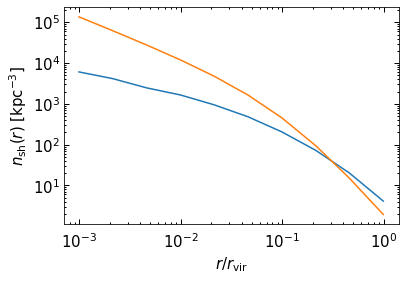

In [5]:
plt.xlabel(r'$r/r_{\rm vir}$')
plt.ylabel(r'$n_{\rm sh}(r)$ [kpc$^{-3}$]')
plt.loglog(q_list,nsh_list)
plt.loglog(q_list2,nsh_list2)
#plt.loglog(q_list,3e2*np.exp(-2./.678*(q_list/0.81*1.25)**.678))
#plt.loglog(q_list,1e4/(q_list**2+0.1**2)**(3./2.))